In [37]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 kB 7.1 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import tqdm
import os
import pandas as pd
import torch
import numpy as np
import datasets
import torch.nn as nn
import transformers
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
import spacy
import string
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

from sentence_transformers import SentenceTransformer

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import json
from tqdm import tqdm
import numpy as np
import spacy
import time 
import pandas as pd 
from rouge_score import rouge_scorer
import os
import sys

In [3]:
dataset_path = "/scratch/kd1860/DSGA_1006_capstone/dataset/moodys/filtered_dataset_with_embedding/shard_0.jsonl"
df = pd.read_json(path_or_buf=dataset_path, lines= False)

# concatnate 4 dataset

In [3]:
dataset_path_0 = "/scratch/kd1860/DSGA_1006_capstone/dataset/moodys/filtered_dataset_with_embedding/shard_0.jsonl"
dataset_path_1 = "/scratch/kd1860/DSGA_1006_capstone/dataset/moodys/filtered_dataset_with_embedding/shard_1.jsonl"
dataset_path_2 = "/scratch/kd1860/DSGA_1006_capstone/dataset/moodys/filtered_dataset_with_embedding/shard_2.jsonl"
dataset_path_3 = "/scratch/kd1860/DSGA_1006_capstone/dataset/moodys/filtered_dataset_with_embedding/shard_3.jsonl"


In [125]:
df_0 = pd.read_json(path_or_buf=dataset_path_0, lines= False)
df_1 = pd.read_json(path_or_buf=dataset_path_1, lines= False)


In [126]:
df_2 = pd.read_json(path_or_buf=dataset_path_2, lines= False)
df_3 = pd.read_json(path_or_buf=dataset_path_3, lines= False)


In [127]:
df = pd.concat([df_0, df_1, df_2, df_3])

In [128]:
df.shape

(18744, 12)

In [173]:
start_date = "2019-09-01"
end_date = "2019-09-02"
df1 = df.loc[df["published_datetime"] >= start_date]
df2 = df1.loc[df1["published_datetime"] <= end_date]

In [174]:
df2.shape

(605, 12)

In [163]:
max(df2["published_datetime"])

'2019-09-20T23:45:00-04:00'

In [175]:
# embedding = [j for j in i for i in df2["embedding"]]
embedding = []
for i in df2["embedding"]:
    for j in i:
        embedding.append(j)

In [176]:
len(embedding)

23486

In [177]:
cur = -1
embedding_l = len(embedding)
best_label = np.ndarray(embedding_l).reshape(-1,1)
cluster = np.arange(2,10)
    

for i in cluster:  # get best num_clusters from silhouette score
    labels = KMeans(n_clusters=i).fit(embedding).labels_  # ,init="k-means++",random_state=200
    score = metrics.silhouette_score(embedding, labels, metric="euclidean")
    if score > cur:
        cur = score
        best_label = labels



# Histogram of labels

In [113]:
import matplotlib.pyplot as plt

(array([16412.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7074.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

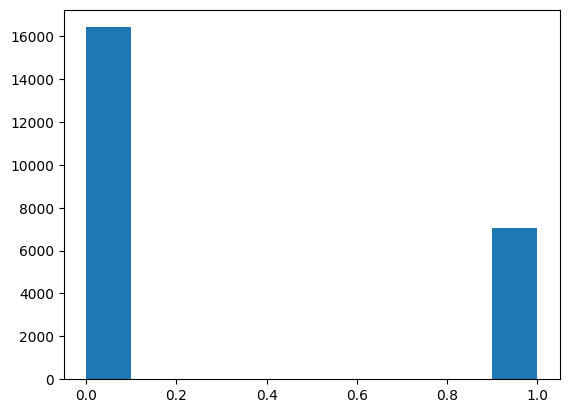

In [114]:
#number of clusters on 20190901
plt.hist(best_label)

(array([4823.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4796.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

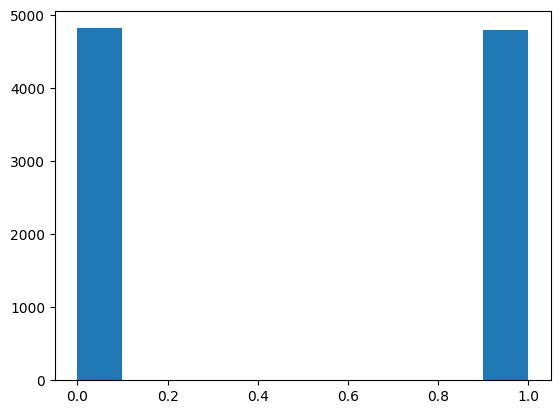

In [148]:
#number of clusters on 20190915
plt.hist(best_label)

(array([14140.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5107.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

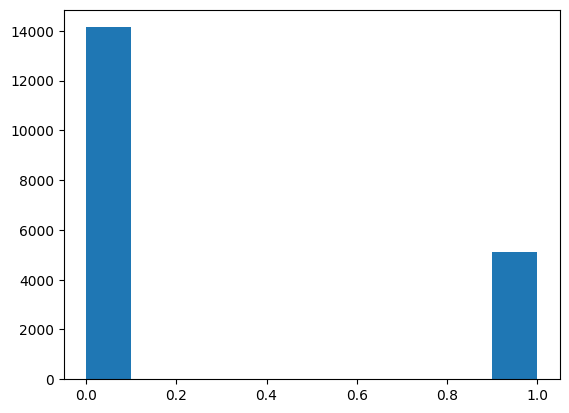

In [166]:
#number of clusters on 20190920
plt.hist(best_label)

In [167]:
clusters, sents_distribution = np.unique(best_label, return_counts=True)
sents_distribution

array([14140,  5107])

In [229]:
indices = np.where(best_label==4)
indices

(array([    4,    10,    13, ..., 28753, 28757, 28792]),)

In [179]:
sent = []

In [180]:
for i in df2["content"]:
    for j in i["filtered_sentences"]:
        sent.append(j)

In [156]:
sent = np.array(sent)
sent.shape

(9619,)

In [181]:
d = pd.DataFrame()
d["sentence"] = sent
d["label"] = best_label

In [182]:
d.head()

,sentence,label
0,"FAW-Volkswagen recalls over 130,000 cars in Ch...",1
1,"FAW-Volkswagen recalls over 130,000 cars in Ch...",1
2,"The recall, beginning on Aug. 29, involves cer...",1
3,Incorrect configuration with the diagnostic so...,0
4,It said the company would upgrade the BCM soft...,1


# Word Cloud

In [121]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# % matplotlib inline

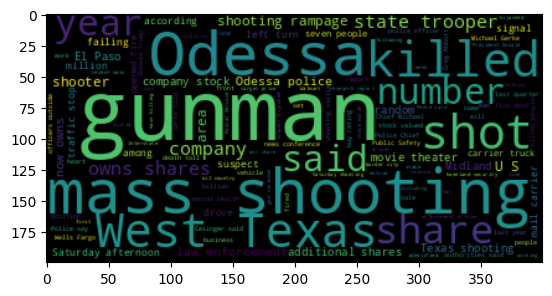

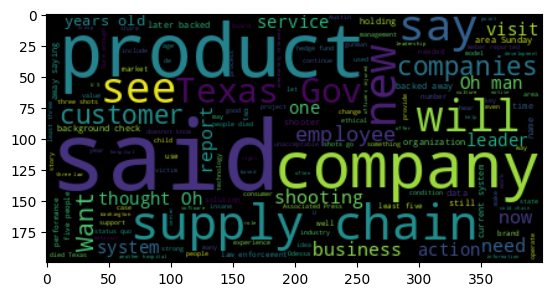

In [122]:
#2019-09-01
for i in clusters:
    test = d.loc[d["label"] == i]["sentence"].tolist()
    wordcloud = WordCloud().generate("".join(test))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

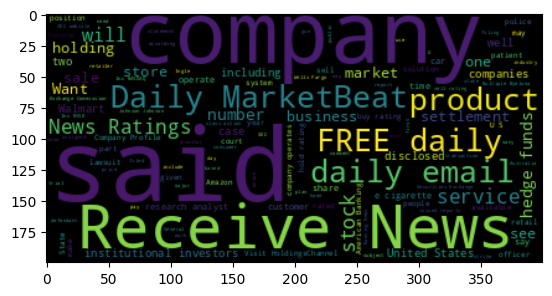

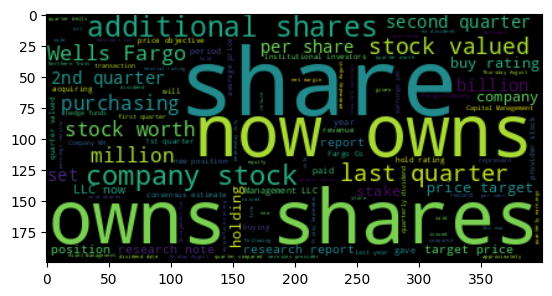

In [159]:
#2019-09-15
for i in clusters:
    test = d.loc[d["label"] == i]["sentence"].tolist()
    wordcloud = WordCloud().generate("".join(test))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

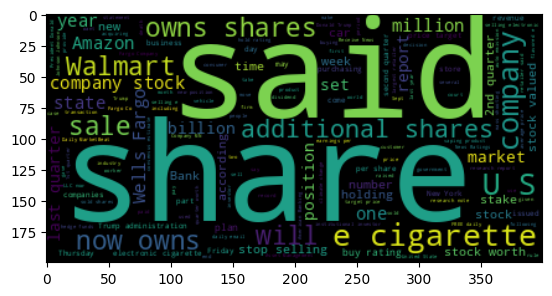

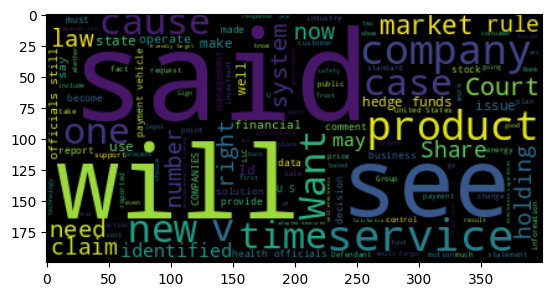

In [172]:
#2019-09-20
for i in clusters:
    test = d.loc[d["label"] == i]["sentence"].tolist()
    wordcloud = WordCloud().generate("".join(test))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

# Pegasus

In [206]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from datasets import load_from_disk
import torch
import sys

model_name = "google/pegasus-multi_news"
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(device)

In [202]:
clusters, sents_distribution = np.unique(d["label"], return_counts=True)
label = np.array(d["label"])

In [203]:
indices = np.where(label == 0)
string = str()
for i in sent[indices]:
    string += "".join(i)

In [204]:
string

'Incorrect configuration with the diagnostic software between the vehicles\' body control modules (BCMs) and LED light drivers could lead to safety risks, according to the statement.The family setup "looks like an overly complex structure in a world that needs super-fast decision making."Nature seems to be telling mankind that it is living on borrowed time.In other words, fleet emissions legislation for new cars -- while a key motivator underpinning automakers\' EV plans -- is now no longer the sole regulatory risk influencing their carbon strategy.Any CO2 produced that cannot be avoided will be offset at additional cost via certified programs.Management is even considering playing an active role.Kallenius aims to link a portion of management pay to the achievement of these goals, even if the CEO wonot specify how much.Prove it Specialists such as consultancy South Pole, which counts VW Group as a client, can come to the aid of automakers looking to decarbonize their operations.To do t

In [207]:
batch = tokenizer(string, truncation=True, padding="longest", return_tensors="pt").to(device)
translated = model.generate(**batch)
print(tokenizer.batch_decode(translated, skip_special_tokens=True))

/ext3/miniconda3/lib/python3.9/site-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 256 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['– Delta Air Lines has a message for its flight attendants: "Be Delta." That\'s what the Association of Flight Attendants union is asking its members to do in response to the airline\'s recent decision to fire a flight attendant who spoke out against the company\'s plan to unionize. Per the New York Times, flight attendants were told in a memo that they could lose their jobs if they didn\'t sign a document saying they did not want to unionize. That document was sent to all 30,000 of Delta\'s flight attendants around the world, though it\'s not clear how many of them have actually agreed to the unionization plan. "If you donot, you have disciplinary actions, you can lose your job," a former general counsel of the AFL-CIO tells the Times. "Delta is very smart in their campaigns. If you do not, you have to take it. If you do not, you have to be kicked out. That opens up the opportunity for the Association of Flight Attendants union to also vie for representation." Delta says it has a "fe

# Bert summary

In [190]:
import torch
from summarizer import Summarizer

In [192]:
bert = Summarizer('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [49]:
# dataset_path = "/scratch/sl6246/DSGA_1006_capstone/dataset/moodys/cluster_for_each/shard_0.jsonl"
# df = pd.read_json(path_or_buf=dataset_path, lines= False)

In [183]:
clusters, sents_distribution = np.unique(d["label"], return_counts=True)
label = np.array(d["label"])

In [186]:
d.head()

,sentence,label
0,"FAW-Volkswagen recalls over 130,000 cars in Ch...",1
1,"FAW-Volkswagen recalls over 130,000 cars in Ch...",1
2,"The recall, beginning on Aug. 29, involves cer...",1
3,Incorrect configuration with the diagnostic so...,0
4,It said the company would upgrade the BCM soft...,1


In [187]:
sent = np.array(d["sentence"])

In [188]:
clusters

array([0, 1], dtype=int32)

In [195]:
string = str()
for i in sent[indices]:
    string += "".join(i)

'work with '

In [201]:
for c in clusters:
    indices = np.where(label == c)
    string = str()
    for i in sent[indices]:
        string += "".join(i)
    sub_sum = bert(string[:1000000],num_sentences = 3)
    print(sub_sum)

Incorrect configuration with the diagnostic software between the vehicles' body control modules (BCMs) and LED light drivers could lead to safety risks, according to the statement. Some of these stretch back to the late 1800s;Local decision-making: We empower our team members to deliver the many resources of Wells Fargo and to make credit and financing decisions locally.rcraver@wsjournal.com336-727-7376@rcraverWSJGerke said he has some idea of who the gunman was. Police vehicles sit outside ofCinergyRead moreHe later backed away, saying the current system of background checks was "very, very strong".
FAW-Volkswagen recalls over 130,000 cars in China [SINA English (China)]FAW-Volkswagen recalls over 130,000 cars in China Sino-German joint venture FAW-Volkswagen has started to recall 130,462 Audi Q3 vehicles in China due to defects, according to the country's market regulator. This represents a $2.00 annualized dividend and a dividend yield of 1.57%.Wells Fargo & Co increased their targe

In [27]:
sub_sum = bert(string,num_sentences = 3)

In [28]:
sub_sum 

'Union leaders become salespeople for contract concessions also known as takebacks from the workers. For those who have difficulty budgeting for unexpected costs, extended warranties are available from every manufacturer and from private insurance companies.(Was this email forwarded to you?Nissan may replace its C.E.O.It may focus on whether the company improperly stifled competition in the social networking by buying rivals. We were required to assess whether our valuation allowance analyses was affectedby various aspects of the Act (e.g., deemed repatriation of deferred foreignincome, Global Intangible Low-Taxed Income ("GILTI") inclusions, and newcategories of Foreign Tax Credits).Since, as discussed herein, we have recordedprovisional amounts related to certain portions of the Act, any correspondingdetermination of the need for, or any change in, a valuation allowance was alsoprovisional.'

In [61]:
cluster_string

"That's down from a $1 million cap earlier."

# Nothing below

In [30]:
labels = best_label
clusters, sents_distribution = np.unique(labels, return_counts=True)
indices = np.where(sents_distribution >= 30)
embedding = np.array(df["embedding"][1])

In [31]:
sents_distribution

array([3781, 1853, 3163, 1453, 1979, 2887, 1647, 1737, 2976, 2010])

In [165]:
a= df2["embedding"].to_frame()
b=np.array(a["embedding"].values.tolist()).flatten()
b.shape

/state/partition1/job-27708331/ipykernel_2043566/4271642583.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b=np.array(a["embedding"].values.tolist()).flatten()


(50,)

In [106]:
len(res[0])

5

In [28]:
sents_ind = np.where(labels == 0)
sents_ind

(array([ 1,  2,  3,  6,  9, 12, 13, 14, 15, 17, 19, 20, 21, 23, 25, 26, 28,
        31, 33, 34, 35, 39, 41, 42, 45, 48, 49, 51, 54, 55, 57, 59, 60, 62,
        65, 67, 69, 71, 72, 74, 76, 77, 78, 79, 80, 83, 85, 87, 89, 90]),)

In [236]:
from datasets import load_from_disk
result= load_from_disk("/scratch/kd1860/DSGA_1006_capstone/dataset/multi_news_test_pegasus/shard_0")

In [237]:
result

Dataset({
    features: ['document', 'summary', 'rouge_scores', 'entity_counts', 'embedding', 'labels', 'reclustered_labels', 'clustered_scores', 'pred'],
    num_rows: 1125
})

In [238]:
for i in range(150):
    l = np.array(result['reclustered_labels'][i])
    clusters, sents_distribution = np.unique(l, return_counts=True)
    if len(clusters) == 3:
        print(i)
#         print(len(result['embedding'][i]))

9
10
14
15
19
28
35
36
38
44
50
54
55
62
67
70
72
76
80
83
85
87
96
97
99
100
101
102
103
107
115
116
120
122
127
134
135
136
142
146
147


In [250]:
result['document'][101]

[['According to Weatherford, those preliminary maps will not change- at the most, any additional changes would be minimal, and those changes would not make any appreciable difference from the preliminary maps.',
  'Also, Will Weatherford: The Florida legislature has NOT targeted Allen West \n \n Update',
  'West stated that maps were submitted to the legislature which would have kept his district intact and still been in compliance with state and federal law.',
  'Levin said he did not believe the excuses being made that the map had to be drawn the way it was as a matter of law.'],
 ['Congressman Allen West spoke at a Florida GOP dinner last night, and had some fighting words for Democrats who are trying to mark Florida in the win column this November.',
  'He declared it a “battlefield” for citizens to stand on and tell the Democrats that their message is not going to resonate with the citizens of Florida.',
  'West called out not just President Obama, but Harry Reid, Nancy Pelosi, an

In [221]:
clusters, sents_distribution

(array([0, 1, 2, 3, 4]), array([ 2, 14, 12, 10, 12]))